In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('priester.csv')

In [7]:
df

,pitching_appearance,pitcher,batter,bats_l/r,total_pitch_count,ab_pitch_count,plate_appearance,inning,pitch_result,count,pitch_type,exit_velo,pitch_velo,spin_rate,v_break,h_break
0,1,Quinn Priester,Alan Roden,L,1,1,1,1,Ball,0-0,4-Seam Fastball,NaN,92.2,2163,20,3
1,1,Quinn Priester,Alan Roden,L,2,2,1,1,Called Strike,1-0,Sinker,NaN,92.1,1912,27,15
2,1,Quinn Priester,Alan Roden,L,3,3,1,1,Called Strike,1-1,Changeup,NaN,87.7,1338,33,17
3,1,Quinn Priester,Alan Roden,L,4,4,1,1,Ball,1-2,Changeup,NaN,88.3,1326,33,14
4,1,Quinn Priester,Alan Roden,L,5,5,1,1,"In play, single",2-2,Changeup,108.6,88.7,1449,29,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,8,Quinn Priester,Carlos Cortes,L,531,1,142,4,Ball,0-0,Slider,NaN,86.9,2479,33,2
531,8,Quinn Priester,Carlos Cortes,L,532,2,142,4,Called Strike,1-0,Sinker,NaN,93.7,1980,27,17
532,8,Quinn Priester,Carlos Cortes,L,533,3,142,4,"In play, home run",1-1,4-Seam Fastball,99,92.3,2254,16,8
533,8,Quinn Priester,Austin Allen,L,534,1,143,4,Swinging Strike,0-0,Curveball,NaN,81.9,2629,46,5


I want to explore Priester's whiff rates for each pitch type againist for both lefty and righty hitters. 

First, I will create a new dataframe which contains the necessary columns for this exercise: bats_l/r, pitch_result, and pitch_type.


In [128]:
new_df=df[['bats_l/r', 'pitch_result', 'pitch_type']] 

Now, I will split the dataframe into two dataframes: total pitches thrown to lefties, and total pitches thrown to righties. I will revisit these two dataframes later on:

In [132]:
lefty_total=new_df.loc[(new_df['bats_l/r']==('L'))]
righty_total=new_df.loc[(new_df['bats_l/r']==('R'))]    

Now, to find the TOTAL pitches thrown by pitch type:

In [133]:
lefty_sinker_total=len(lefty_total.loc[(lefty_total['pitch_type']==('Sinker'))])
lefty_changeup_total=len(lefty_total.loc[(lefty_total['pitch_type']==('Changeup'))])
lefty_4seam_total=len(lefty_total.loc[(lefty_total['pitch_type']==('4-Seam Fastball'))])
lefty_slider_total=len(lefty_total.loc[(lefty_total['pitch_type']==('Slider'))])
lefty_curveball_total=len(lefty_total.loc[(lefty_total['pitch_type']==('Curveball'))])

righty_sinker_total=len(righty_total.loc[(righty_total['pitch_type']==('Sinker'))])
righty_changeup_total=len(righty_total.loc[(righty_total['pitch_type']==('Changeup'))])
righty_4seam_total=len(righty_total.loc[(righty_total['pitch_type']==('4-Seam Fastball'))])
righty_slider_total=len(righty_total.loc[(righty_total['pitch_type']==('Slider'))])
righty_curveball_total=len(righty_total.loc[(righty_total['pitch_type']==('Curveball'))])

Next, for this exercise I am only concerned about pitches that were swung at by the batter. Thus, we want to include all rows that include swinging strikes, foul balls, or balls hit in play.

In [104]:
new_df_2=new_df.loc[(new_df['pitch_result'].str.contains('In play') | 
            (new_df['pitch_result'].str.contains('Foul') | 
            (new_df['pitch_result'].str.contains('Swinging'))))]

In [105]:
new_df_2

,bats_l/r,pitch_result,pitch_type
4,L,"In play, single",Changeup
17,R,Swinging Strike,Slider
20,R,Foul,Sinker
21,R,Swinging Strike,Slider
22,L,"In play, double",Curveball
...,...,...,...
526,R,Foul,Slider
527,R,Foul,4-Seam Fastball
532,L,"In play, home run",4-Seam Fastball
533,L,Swinging Strike,Curveball


Next, there are two results in this dataset that we do not want for the sake of this exercise: foul bunt and catchers interference.

In [106]:
new_df_3=new_df_2.loc[(new_df_2['pitch_result'].str.contains('Bunt') == False)]
new_df_4=new_df_3.loc[(new_df_3['pitch_result'].str.contains('interference') == False)]          

In [107]:
new_df_4

,bats_l/r,pitch_result,pitch_type
4,L,"In play, single",Changeup
17,R,Swinging Strike,Slider
20,R,Foul,Sinker
21,R,Swinging Strike,Slider
22,L,"In play, double",Curveball
...,...,...,...
526,R,Foul,Slider
527,R,Foul,4-Seam Fastball
532,L,"In play, home run",4-Seam Fastball
533,L,Swinging Strike,Curveball


To summarize our progress, we see that Quinn Priester has thrown 254 pitches for the Worcester Red Sox this season that were swung at by the batter.

In [108]:
254/535

0.4747663551401869

Since Priester has joined the Worcester Red Sox, hitters are swinging at 47.7% of the pitches he's thrown. 

Next, we will further break this dataframe down into two separate dataframes: lefty hitters and righty hitters.

In [109]:
lefty=new_df_4.loc[(new_df_4['bats_l/r']==('L'))]
righty=new_df_4.loc[(new_df_4['bats_l/r']==('R'))]        

In [110]:
lefty

,bats_l/r,pitch_result,pitch_type
4,L,"In play, single",Changeup
22,L,"In play, double",Curveball
26,L,"In play, single",4-Seam Fastball
34,L,"In play, flyout",Curveball
43,L,Swinging Strike,Slider
...,...,...,...
521,L,Swinging Strike,Slider
522,L,"In play, flyout",4-Seam Fastball
532,L,"In play, home run",4-Seam Fastball
533,L,Swinging Strike,Curveball


In [111]:
righty

,bats_l/r,pitch_result,pitch_type
17,R,Swinging Strike,Slider
20,R,Foul,Sinker
21,R,Swinging Strike,Slider
24,R,Swinging Strike,Changeup
25,R,Swinging Strike,4-Seam Fastball
...,...,...,...
505,R,Swinging Strike,Sinker
508,R,"In play, groundout",Changeup
524,R,Foul,4-Seam Fastball
526,R,Foul,Slider


Now, we will further filter by pitch type.

In [112]:
lefty_sinker=lefty.loc[(lefty['pitch_type']==('Sinker'))]
lefty_changeup=lefty.loc[(lefty['pitch_type']==('Changeup'))]
lefty_4seam=lefty.loc[(lefty['pitch_type']==('4-Seam Fastball'))]
lefty_slider=lefty.loc[(lefty['pitch_type']==('Slider'))]
lefty_curveball=lefty.loc[(lefty['pitch_type']==('Curveball'))]

righty_sinker=righty.loc[(righty['pitch_type']==('Sinker'))]
righty_changeup=righty.loc[(righty['pitch_type']==('Changeup'))]
righty_4seam=righty.loc[(righty['pitch_type']==('4-Seam Fastball'))]
righty_slider=righty.loc[(righty['pitch_type']==('Slider'))]
righty_curveball=righty.loc[(righty['pitch_type']==('Curveball'))]

Now, to calculate whiff rate, we divide the number of swinging strikes by the total swings for each parameter. I will also print the total pitch counts here as well, which we calculated earlier.

In [138]:
print('Sinker whiff rate vs lefties: ')
print((len(lefty_sinker.loc[(lefty_sinker['pitch_result']==('Swinging Strike'))].index))/(len(lefty_sinker)))
print('Swings:')
print(len(lefty_sinker))
print('')
print('Sinker whiff rate vs righties: ')
print((len(righty_sinker.loc[(righty_sinker['pitch_result']==('Swinging Strike'))].index))/(len(righty_sinker)))
print('Swings:')
print(len(righty_sinker))
print('')
print('Changeup whiff rate vs lefties: ')
print((len(lefty_changeup.loc[(lefty_changeup['pitch_result']==('Swinging Strike'))].index))/(len(lefty_changeup)))
print('Swings:')
print(len(lefty_changeup))
print('')
print('Changeup whiff rate vs righties: ')
print((len(righty_changeup.loc[(righty_changeup['pitch_result']==('Swinging Strike'))].index))/(len(righty_changeup)))
print('Swings:')
print(len(righty_changeup))
print('')
print(' 4-Seam Fastball whiff rate vs lefties: ')
print((len(lefty_4seam.loc[(lefty_4seam['pitch_result']==('Swinging Strike'))].index))/(len(lefty_4seam)))
print('Swings:')
print(len(lefty_4seam))
print('')
print('4-Seam Fastball whiff rate vs righties: ')
print((len(righty_4seam.loc[(righty_4seam['pitch_result']==('Swinging Strike'))].index))/(len(righty_4seam)))
print('Swings:')
print(len(righty_4seam))
print('')
print('Slider whiff rate vs lefties: ')
print((len(lefty_slider.loc[(lefty_slider['pitch_result']==('Swinging Strike'))].index))/(len(lefty_slider)))
print('Swings:')
print(len(lefty_slider))
print('')
print('Slider whiff rate vs righties: ')
print((len(righty_slider.loc[(righty_slider['pitch_result']==('Swinging Strike'))].index))/(len(righty_slider)))
print('Swings:')
print(len(righty_slider))
print('')
print('Curveball whiff rate vs lefties: ')
print((len(lefty_curveball.loc[(lefty_curveball['pitch_result']==('Swinging Strike'))].index))/(len(lefty_curveball)))
print('Swings:')
print(len(lefty_curveball))
print('')
print('Curveball whiff rate vs righties: ')
print((len(righty_curveball.loc[(righty_curveball['pitch_result']==('Swinging Strike'))].index))/(len(righty_curveball)))
print('Swings:')
print(len(righty_curveball))
print('')


Sinker whiff rate vs lefties: 
0.06451612903225806
Swings:
31

Sinker whiff rate vs righties: 
0.21568627450980393
Swings:
51

Changeup whiff rate vs lefties: 
0.4782608695652174
Swings:
23

Changeup whiff rate vs righties: 
0.3
Swings:
10

 4-Seam Fastball whiff rate vs lefties: 
0.20833333333333334
Swings:
24

4-Seam Fastball whiff rate vs righties: 
0.2222222222222222
Swings:
9

Slider whiff rate vs lefties: 
0.43478260869565216
Swings:
23

Slider whiff rate vs righties: 
0.5
Swings:
64

Curveball whiff rate vs lefties: 
0.2857142857142857
Swings:
14

Curveball whiff rate vs righties: 
0.6
Swings:
5



By these results, we see that Priester's best whiff rate during his time with the Woo Sox has been throwing his curveball to righties. Righty hitters have whiffed at his curveball 60% of the time they swing at it. However, this is a small sample size, as righty hitters have only swung at his curveball 5 times. 

A very encouraging result here for Priester is his Slider against righties. During his time with Worcester, righties have swung at his slider 64 times and whiffed on 50% of those swings. This is incredible.

I am now going to add in code to include the total pitches thrown for each paramter to give us a better understanding of what's happening.

In [140]:
print('Sinker whiff rate vs lefties: ')
print((len(lefty_sinker.loc[(lefty_sinker['pitch_result']==('Swinging Strike'))].index))/(len(lefty_sinker)))
print('Swings:')
print(len(lefty_sinker))
print('Pitches: ')
print(lefty_sinker_total)
print('')
print('Sinker whiff rate vs righties: ')
print((len(righty_sinker.loc[(righty_sinker['pitch_result']==('Swinging Strike'))].index))/(len(righty_sinker)))
print('Swings:')
print(len(righty_sinker))
print('Pitches: ')
print(righty_sinker_total)
print('')
print('Changeup whiff rate vs lefties: ')
print((len(lefty_changeup.loc[(lefty_changeup['pitch_result']==('Swinging Strike'))].index))/(len(lefty_changeup)))
print('Swings:')
print(len(lefty_changeup))
print('Pitches: ')
print(lefty_changeup_total)
print('')
print('Changeup whiff rate vs righties: ')
print((len(righty_changeup.loc[(righty_changeup['pitch_result']==('Swinging Strike'))].index))/(len(righty_changeup)))
print('Swings:')
print(len(righty_changeup))
print('Pitches: ')
print(righty_changeup_total)
print('')
print('4-Seam Fastball whiff rate vs lefties: ')
print((len(lefty_4seam.loc[(lefty_4seam['pitch_result']==('Swinging Strike'))].index))/(len(lefty_4seam)))
print('Swings:')
print(len(lefty_4seam))
print('Pitches: ')
print(lefty_4seam_total)
print('')
print('4-Seam Fastball whiff rate vs righties: ')
print((len(righty_4seam.loc[(righty_4seam['pitch_result']==('Swinging Strike'))].index))/(len(righty_4seam)))
print('Swings:')
print(len(righty_4seam))
print('Pitches: ')
print(righty_4seam_total)
print('')
print('Slider whiff rate vs lefties: ')
print((len(lefty_slider.loc[(lefty_slider['pitch_result']==('Swinging Strike'))].index))/(len(lefty_slider)))
print('Swings:')
print(len(lefty_slider))
print('Pitches: ')
print(lefty_slider_total)
print('')
print('Slider whiff rate vs righties: ')
print((len(righty_slider.loc[(righty_slider['pitch_result']==('Swinging Strike'))].index))/(len(righty_slider)))
print('Swings:')
print(len(righty_slider))
print('Pitches: ')
print(righty_slider_total)
print('')
print('Curveball whiff rate vs lefties: ')
print((len(lefty_curveball.loc[(lefty_curveball['pitch_result']==('Swinging Strike'))].index))/(len(lefty_curveball)))
print('Swings:')
print(len(lefty_curveball))
print('Pitches: ')
print(lefty_curveball_total)
print('')
print('Curveball whiff rate vs righties: ')
print((len(righty_curveball.loc[(righty_curveball['pitch_result']==('Swinging Strike'))].index))/(len(righty_curveball)))
print('Swings:')
print(len(righty_curveball))
print('Pitches: ')
print(righty_curveball_total)
print('')


Sinker whiff rate vs lefties: 
0.06451612903225806
Swings:
31
Pitches: 
79

Sinker whiff rate vs righties: 
0.21568627450980393
Swings:
51
Pitches: 
110

Changeup whiff rate vs lefties: 
0.4782608695652174
Swings:
23
Pitches: 
56

Changeup whiff rate vs righties: 
0.3
Swings:
10
Pitches: 
21

4-Seam Fastball whiff rate vs lefties: 
0.20833333333333334
Swings:
24
Pitches: 
48

4-Seam Fastball whiff rate vs righties: 
0.2222222222222222
Swings:
9
Pitches: 
17

Slider whiff rate vs lefties: 
0.43478260869565216
Swings:
23
Pitches: 
39

Slider whiff rate vs righties: 
0.5
Swings:
64
Pitches: 
120

Curveball whiff rate vs lefties: 
0.2857142857142857
Swings:
14
Pitches: 
32

Curveball whiff rate vs righties: 
0.6
Swings:
5
Pitches: 
13



Additionally, going back to the original dataframe, let's examine how many total pitches Priester has thrown to righties, and how many total pitches he's thrown to lefties.

In [21]:
print('Total pitches vs lefties:')
print((len(df.loc[(df['bats_l/r']==('L'))])))
print('Total pitches vs righties:')
print((len(df.loc[(df['bats_l/r']==('R'))])))


Total pitches vs lefties:
254
Total pitches vs righties:
281


Here are my thoughts based on these results:
- So, clearly the two most common pitches Priester throws against righties are his sinker and slider:

In [22]:
print('Sliders vs righties:')
print(120/281)
print('Sinkers vs righties:')
print(110/281)

Sliders vs righties:
0.42704626334519574
Sinkers vs righties:
0.3914590747330961


Against righties, Priester throws his slider 42.7% of the time, and throws his sinker 39.1% of the time. However, scrolling up we see a major difference in whiff rate, as righties have a 21.6% whiff rate against his sinker, compared to a 50% whiff rate against his slider. Should Priester be throwing his slider to righties more than he already is? More analysis needs to done to determine this. Of course, if the high contact rate for righties against Priester's sinker is leading to a lot of groundouts, then it shouldn't be a concern. This will require a separate analysis, but these data results show encouraging signs that maybe Priester should be throwing his slider to righties even more.



A concerning result from our data is Priester's sinker whiff rate against lefties, which is only at 6.5%. This means when lefties swing at Priester's sinker, they make contact 93.5% of the time. However, Priester's slider whiff rate against lefties is 43.5%. If we divide 43.5/6.5, we see that Priester's slider whiff rate against lefties is almost 7 TIMES better than his sinker whiff rate against lefties. Furthermore, interestingly enough, we see that Priester only throws his slider to lefties 15.4% of the time, while he throws his sinker to lefties more than double that, at 31.1%. These results, while more analysis is needed, suggest to me that it may be worth looking into potentially exploring Priester throwing more sliders and less sinkers against lefties. 

In [43]:
lefty_whiff_rates={'Sinker vs Lefties':['6.5%'],'Changeup vs Lefties':['47.8%'],'4-Seam Fastball vs Lefties':['20.8%'],
                   'Slider vs Lefties':['43.5%'],'Curveball vs Lefties':['28.6%']}
lefty_whiff_rates=pd.DataFrame(lefty_whiff_rates)
righty_whiff_rates={'Sinker vs Righties':['21.6%'],'Changeup vs Righties':['30%'],'4-Seam Fastball vs Righties':['22.2%'],
                    'Slider vs Righties':['50%'],'Curveball vs Righties':['60%']}
righty_whiff_rates=pd.DataFrame(righty_whiff_rates)
whiff_rates={'Sinker vs Lefties':['6.5%'],'Sinker vs Righties':['21.6%'],'Changeup vs Lefties':['47.8%'],'Changeup vs Righties':['30%'],
             '4-Seam Fastball vs Lefties':['20.8%'],'4-Seam Fastball vs Righties':['22.2%'],'Slider vs Lefties':['43.5%'],'Slider vs Righties':['50%'],
                 'Curveball vs Lefties':['28.6%'],'Curveball vs Righties':['60%']}
whiff_rates=pd.DataFrame(whiff_rates)

In [40]:
lefty_whiff_rates

,Sinker vs Lefties,Changeup vs Lefties,4-Seam Fastball vs Lefties,Slider vs Lefties,Curveball vs Lefties
0,6.5%,47.8%,20.8%,43.5%,28.6%


In [42]:
righty_whiff_rates

,Sinker vs Righties,Changeup vs Righties,4-Seam Fastball vs Righties,Slider vs Righties,Curveball vs Righties
0,21.6%,30%,22.2%,50%,60%


In [44]:
whiff_rates

,Sinker vs Lefties,Sinker vs Righties,Changeup vs Lefties,Changeup vs Righties,4-Seam Fastball vs Lefties,4-Seam Fastball vs Righties,Slider vs Lefties,Slider vs Righties,Curveball vs Lefties,Curveball vs Righties
0,6.5%,21.6%,47.8%,30%,20.8%,22.2%,43.5%,50%,28.6%,60%


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 6.8 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 5.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 5.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


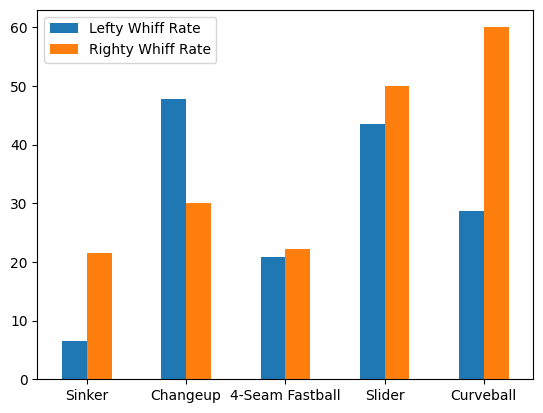

In [52]:
%pip install matplotlib
lefty_whiff_rate=[6.5,47.8,20.8,43.5,28.6]
righty_whiff_rate=[21.6,30,22.2,50,60]
index=['Sinker','Changeup','4-Seam Fastball','Slider','Curveball']
plot_data=pd.DataFrame({'Lefty Whiff Rate':lefty_whiff_rate,'Righty Whiff Rate':righty_whiff_rate},index=index)
ax=plot_data.plot.bar(rot=0)

Next, we will visualize Priester's pitch distribution to lefties and righties. 

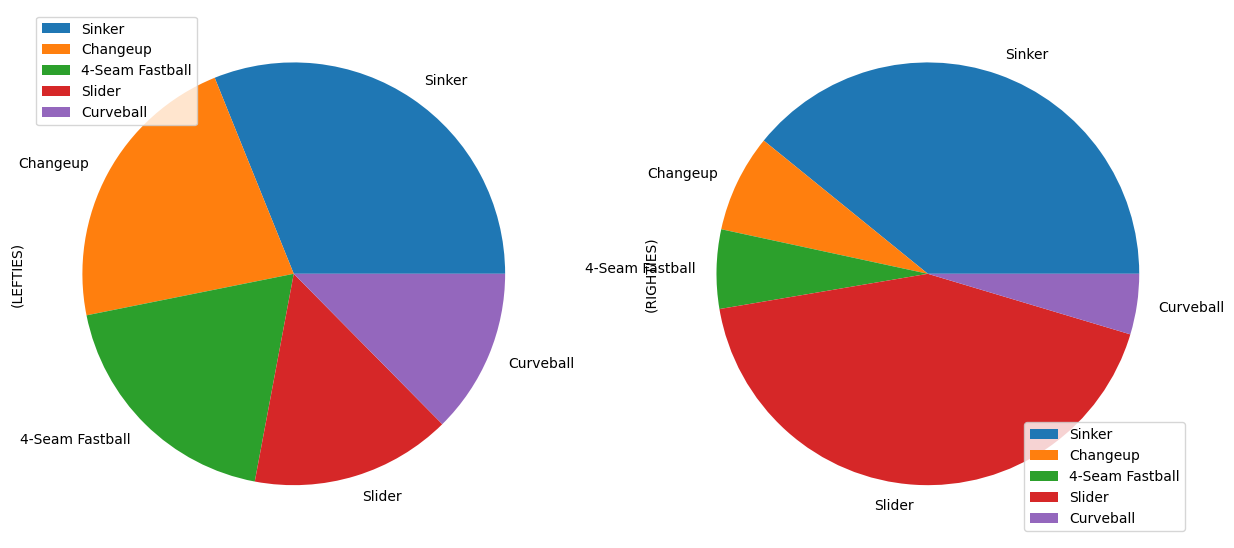

In [142]:
pitch_distribution=pd.DataFrame({'(LEFTIES)':[(lefty_sinker_total),(lefty_changeup_total),(lefty_4seam_total),
                                                                  (lefty_slider_total),(lefty_curveball_total)],
                                 '(RIGHTIES)':[(righty_sinker_total),(righty_changeup_total),(righty_4seam_total),
                                                                   (righty_slider_total),(righty_curveball_total)]},
                                index=['Sinker','Changeup','4-Seam Fastball','Slider','Curveball'])
plot_pitch_distribution=pitch_distribution.plot.pie(subplots=True,figsize=(15,15))                                
                                